Прогноз погоды (weather_data.csv), задания 1 и 2

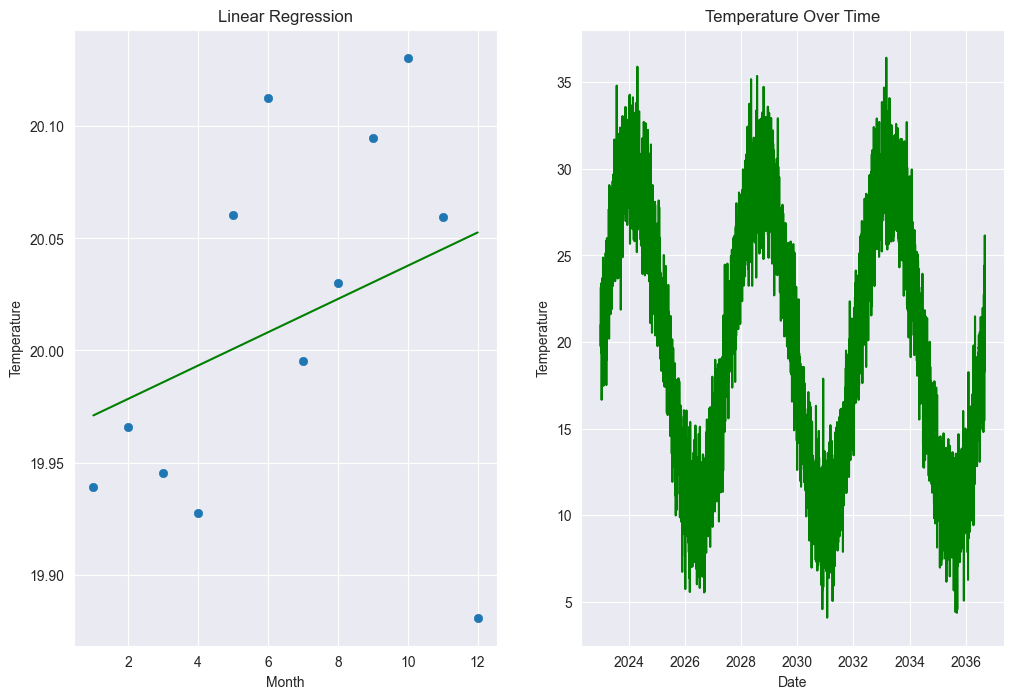

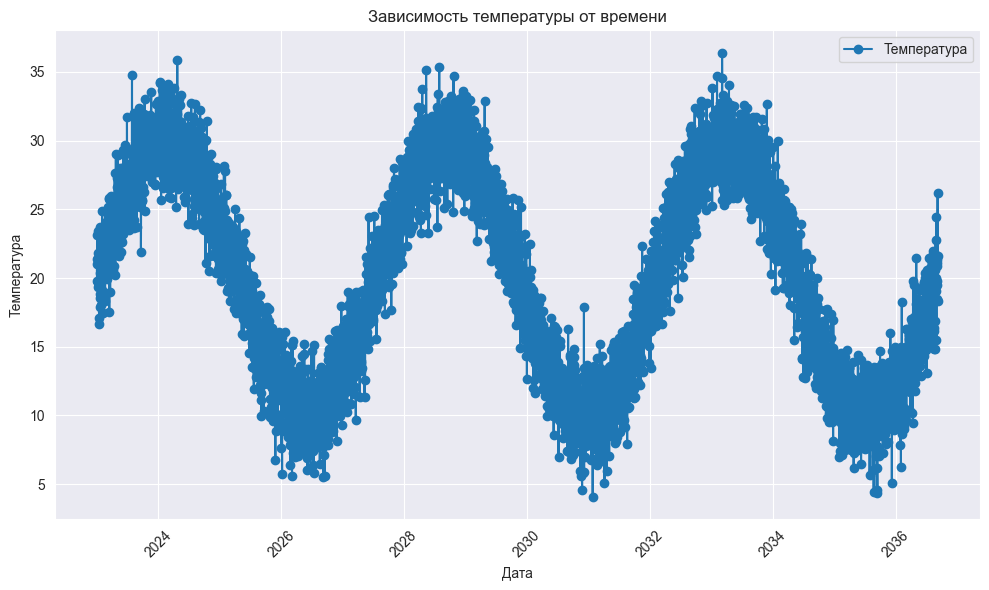

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


data = pd.read_csv('weather_data.csv')
data["Date"] = pd.to_datetime(data["Date"])
data["Month"] = data["Date"].dt.month
mounthly_data = data.groupby("Month").mean().reset_index()

X = mounthly_data["Month"].values.reshape(-1, 1)
Y = mounthly_data["Temperature"].values

temp_model = LinearRegression()
temp_model.fit(X, Y)

Y_pred = temp_model.predict(X)

plt.figure(figsize=(12,8))
plt.subplot(1, 2, 1)
plt.scatter(X, Y, linewidths=0.5)
plt.plot(X, Y_pred, color='green')
plt.xlabel('Month')
plt.ylabel('Temperature')
plt.title('Linear Regression')

plt.subplot(1, 2, 2)
plt.plot(data["Date"], data["Temperature"], color='green')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Temperature Over Time')

plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Temperature'], marker='o', color='tab:blue', label='Температура')

plt.xlabel('Дата')
plt.ylabel('Температура')
plt.title('Зависимость температуры от времени')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


Ирис (iris_data.csv), задания 1 и 2

Accuracy: 1.0
     Actual  Predicted
114       2          2
62        1          1
33        0          0
107       2          2
7         0          0
100       2          2
40        0          0
86        1          1
76        1          1
71        1          1


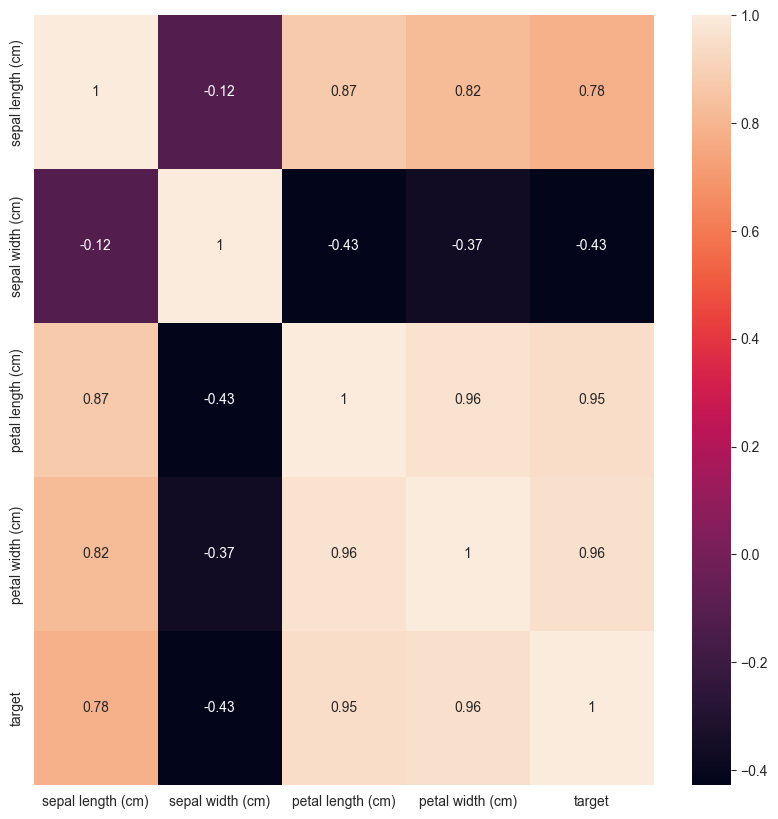

In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler


data = pd.read_csv('iris_data.csv')

X = data.drop(columns=['target'])
Y = data['target']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)
comparison = pd.DataFrame({"Actual": Y_test, "Predicted": Y_pred})
print(comparison.head(10))

correlation_matrix = data.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True)
plt.show()

Покупатели в магазине (customers_data.csv), задания 1 и 2

Средний доход покупателей: 83960.73
Средняя оценка расходов покупателей: 49.97


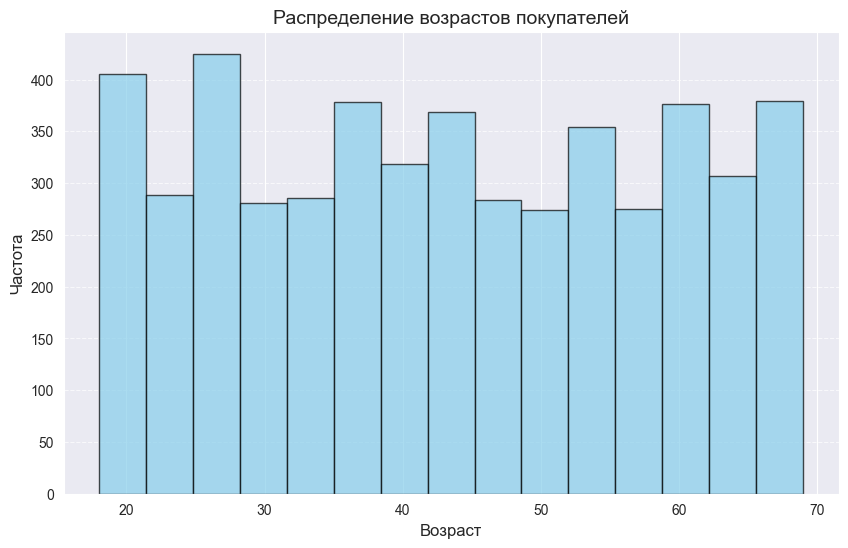

In [6]:
import pandas as pd
import matplotlib.pyplot as plt


file_path = 'customers_data.csv'  
data = pd.read_csv(file_path)

mean_income = data['Annual_Income'].mean()
mean_spending_score = data['Spending_Score'].mean()

print(f"Средний доход покупателей: {mean_income:.2f}")
print(f"Средняя оценка расходов покупателей: {mean_spending_score:.2f}")

plt.figure(figsize=(10, 6))
plt.hist(data['Age'], bins=15, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Распределение возрастов покупателей', fontsize=14)
plt.xlabel('Возраст', fontsize=12)
plt.ylabel('Частота', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Акции (stock_data.csv), задания 1 и 2

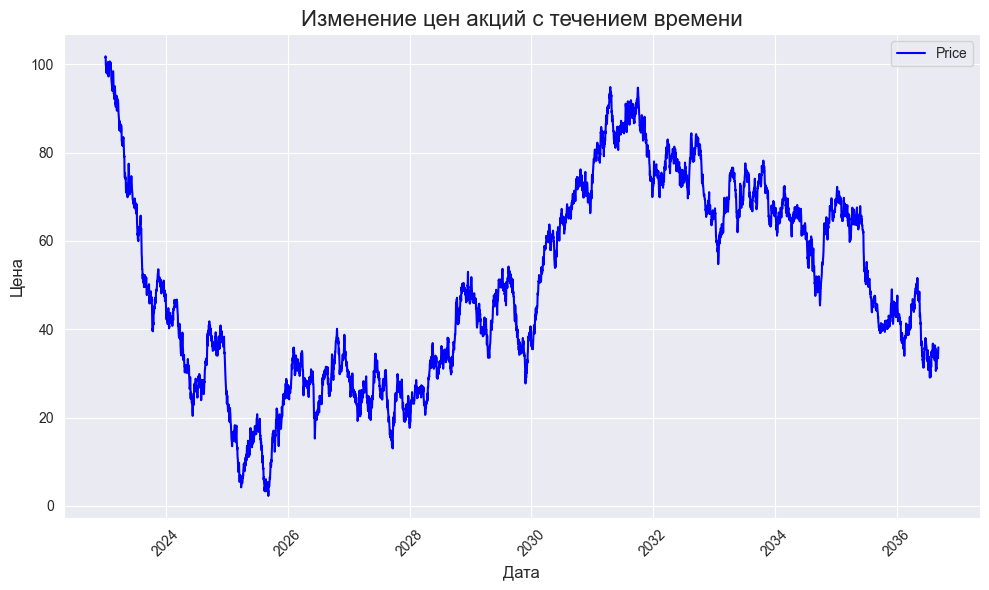

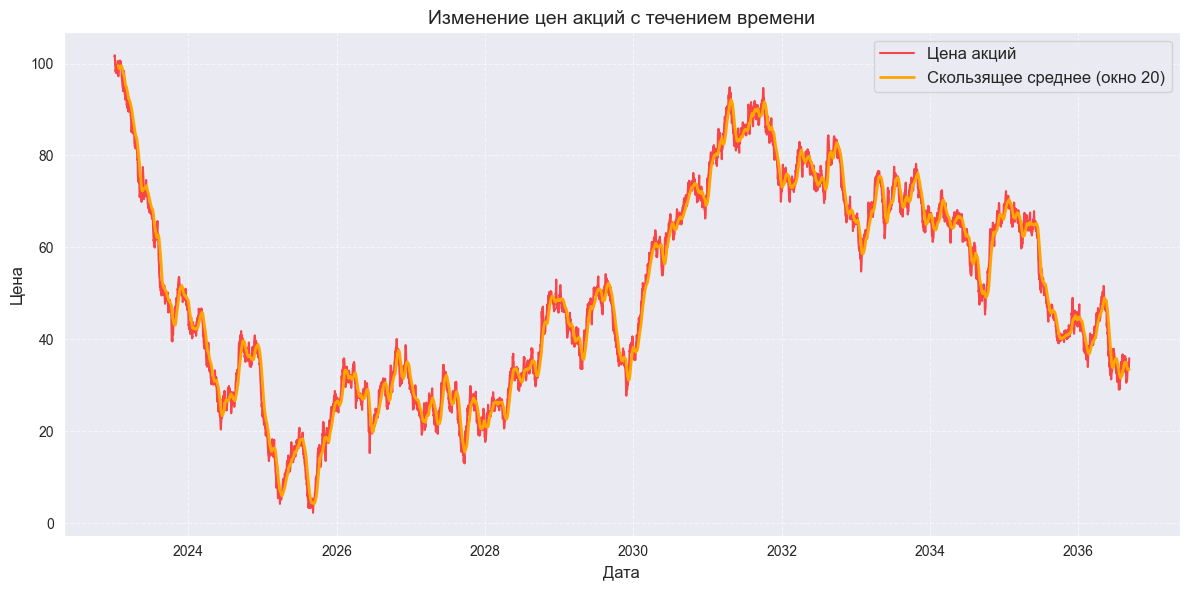

In [18]:
import pandas as pd
import matplotlib.pyplot as plt


file_path = 'stock_data.csv'  
data = pd.read_csv(file_path)

data['Date'] = pd.to_datetime(data['Date'])

window_size = 20  
data['Moving_Avg'] = data['Price'].rolling(window=window_size).mean()

plt.figure(figsize=(10, 6)) 
plt.plot(data['Date'], data['Price'], color='blue', label='Price')

plt.title('Изменение цен акций с течением времени', fontsize=16)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Цена', fontsize=12)

plt.xticks(rotation=45)

plt.grid(True)

plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Price'], label='Цена акций', color='red', alpha=0.7)
plt.plot(data['Date'], data['Moving_Avg'], label=f'Скользящее среднее (окно {window_size})', color='orange', linewidth=2)

plt.title('Изменение цен акций с течением времени', fontsize=14)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Цена', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

plt.show()

Прогнозирование здоровья (health_data.csv), задания 1 и 2

Коэффициенты регрессии: [ 0.30180181 -1.48955857]
Свободный член: 74.66173653532752
Коэффициент детерминации R²: 0.4413906959018893

Средние значения холестерина и BMI по возрастным группам:
           Cholesterol        BMI
Age_Group                        
<20                NaN        NaN
20-40       200.323469  25.222090
40-60       200.480431  25.079207
60-80       199.775710  25.145831
>80                NaN        NaN


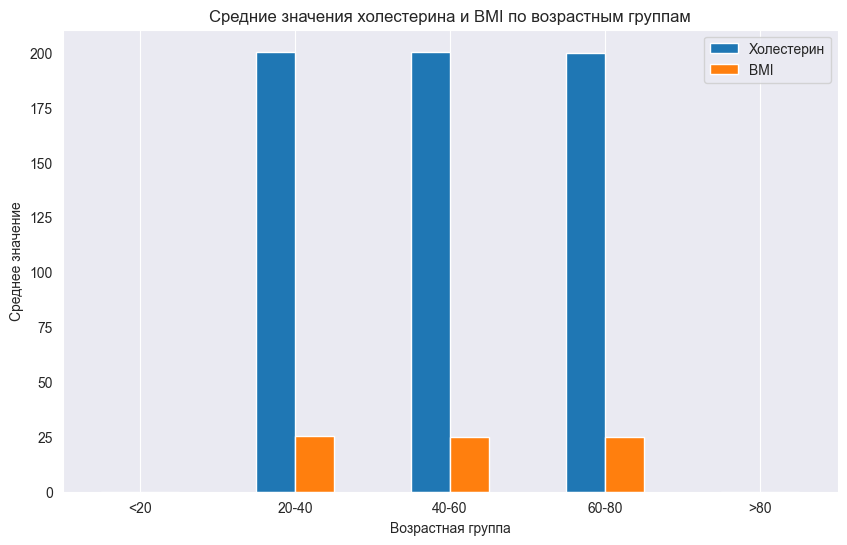

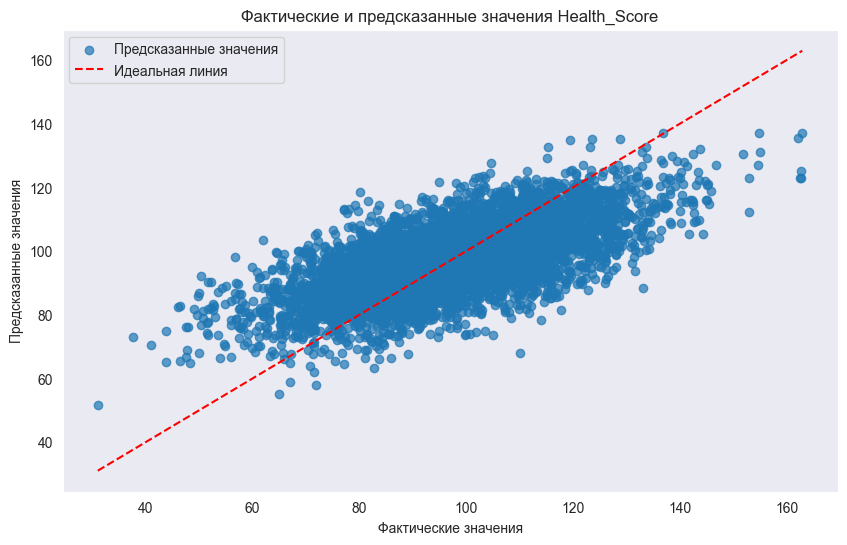

In [8]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


data = pd.read_csv('health_data.csv')

X = data[['Cholesterol', 'BMI']].values  
y = data['Health_Score'].values  

model = LinearRegression()
model.fit(X, y)

print("Коэффициенты регрессии:", model.coef_)
print("Свободный член:", model.intercept_)

y_pred = model.predict(X)

r2_score = model.score(X, y)
print("Коэффициент детерминации R²:", r2_score)

bins = [0, 20, 40, 60, 80, 100]
labels = ['<20', '20-40', '40-60', '60-80', '>80']
data['Age_Group'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

group_means = data.groupby('Age_Group', observed=False)[['Cholesterol', 'BMI']].mean()
print("\nСредние значения холестерина и BMI по возрастным группам:")
print(group_means)

group_means.plot(kind='bar', figsize=(10, 6))
plt.title('Средние значения холестерина и BMI по возрастным группам')
plt.ylabel('Среднее значение')
plt.xlabel('Возрастная группа')
plt.grid(axis='y')
plt.xticks(rotation=0)
plt.legend(['Холестерин', 'BMI'])
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, alpha=0.7, label='Предсказанные значения')
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--', label='Идеальная линия')
plt.title('Фактические и предсказанные значения Health_Score')
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.legend()
plt.grid()
plt.show()

Опрос удовлетворенности клиентов (satisfaction_data.csv), задания 1 и 2

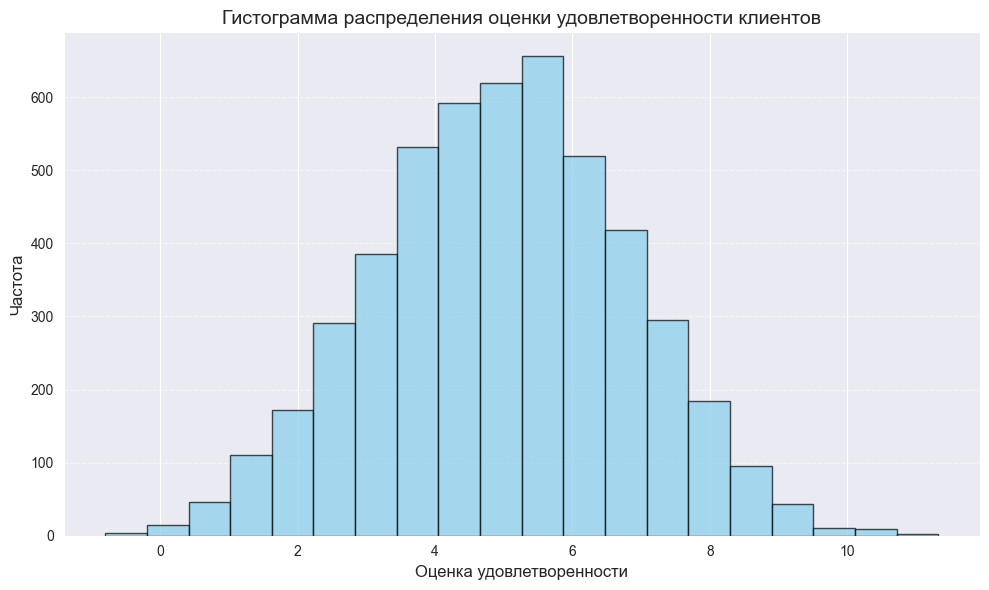

Средняя удовлетворенность по категориям:
- Довольны (1): 6.44
- Недовольны (0): 3.50


In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка данных из CSV файла
file_path = 'satisfaction_data.csv'  # Укажите путь к вашему CSV файлу
data = pd.read_csv(file_path)

# Построение гистограммы оценки удовлетворенности
plt.figure(figsize=(10, 6))
plt.hist(data['Satisfaction_Score'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Гистограмма распределения оценки удовлетворенности клиентов', fontsize=14)
plt.xlabel('Оценка удовлетворенности', fontsize=12)
plt.ylabel('Частота', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Расчет средней удовлетворенности для каждой категории
mean_satisfaction = data.groupby('Satisfaction_Category')['Satisfaction_Score'].mean()

# Вывод результатов
print("Средняя удовлетворенность по категориям:")
print(f"- Довольны (1): {mean_satisfaction[1]:.2f}")
print(f"- Недовольны (0): {mean_satisfaction[0]:.2f}")